### 一、fig, ax = plt.subplots()的作用？

它是用来创建 总画布figure“窗口”的，有figure就可以在上边（或其中一个子网格subplot上）作图了，（fig：是figure的缩写）。

plt.subplot(111)是plt.subplot(1, 1, 1)另一个写法而已[引用链接]，更完整的写法是plt.subplot(nrows=1, ncols=1, index=1)；

fig, ax = plt.subplots()等价于fig, ax = plt.subplots(11)。

fig, axes = plt.subplots(23)：即表示一次性在figure上创建成2*3的网格，使用plt.subplot()只能一个一个的添加：


In [2]:
import numpy as np
import matplotlib.pyplot as plt

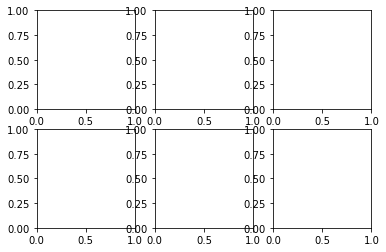

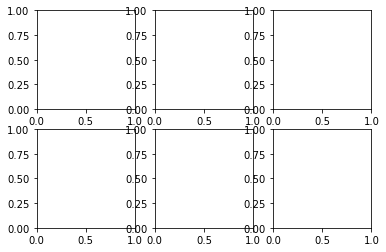

In [17]:
# 注意subplot与subplots
fig = plt.figure()
ax = plt.subplot(231)
ax = plt.subplot(232)
ax = plt.subplot(233)
ax = plt.subplot(234)
ax = plt.subplot(235)
ax = plt.subplot(236)
fig,ax1 = plt.subplots(2,3)
plt.show()

### 二、fig = plt.figure()含义

```python
matpltlib.pyplot.figure(
num = None,               # 设定figure名称。系统默认按数字升序命名的figure_num（透视表输出窗口）e.g. “figure1”。可自行设定figure名称，名称或是INT，或是str类型；
figsize=None,             # 设定figure尺寸。系统默认命令是rcParams["figure.fig.size"] = [6.4, 4.8]，即figure长宽为6.4 * 4.8；
dpi=None,                 # 设定figure像素密度。系统默命令是rcParams["sigure.dpi"] = 100；
facecolor=None,           # 设定figure背景色。系统默认命令是rcParams["figure.facecolor"] = 'w'，即白色white；
edgecolor=None, frameon=True,    # 设定要不要绘制轮廓&轮廓颜色。系统默认绘制轮廓，轮廓染色rcParams["figure.edgecolor"]='w',即白色white；
FigureClass=<class 'matplotlib.figure.Figure'>,   # 设定使不使用一个figure模板。系统默认不使用；
clear=False,                     # 设定当同名figure存在时，是否替换它。系统默认False，即不替换。
**kwargs)
```

In [26]:
# fig,ax = plt.figure(num='f_name', figsize=[15,5], dpi=80, facecolor='green')
# plt.show()

### 三、怎么在一个图上排列多个子图

画一个2 * 2的子图， 每个子图对应一个表

- 先重点考虑2个步骤

第1个步骤：创建多维窗口：

```python
fig, axes = plt.subplots(2, 2)  # 此处是一个2*2的图
```

第2个步骤：设定各个透视子图在窗口的位置：

```python
data.plot.bar(ax=axes[1,1], color='b', alpha=0.5)  # ax=[1,1] 即位置是第2行、第二列。（python从0开始计数，所以“1”代表第2的）
 
data.plot.barh(ax=axes[0,1], color='k', alpha=0.5) # alpha：设定图表的透明度；
```

- 再添加子透视图代码。

第3个步骤：得到完整的代码：

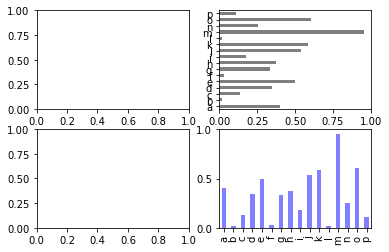

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(2, 2)
 
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
 
data.plot.bar(ax=axes[1,1], color='b', alpha = 0.5)
data.plot.barh(ax=axes[0,1], color='k', alpha=0.5)
 
plt.show()

### 四、怎么把多个子图一起合并到一个图上

最主要的一点是让多个图线共用一个x坐标轴。

语句规定N个折线图共用一个x坐标（注意：y轴分主副轴）：

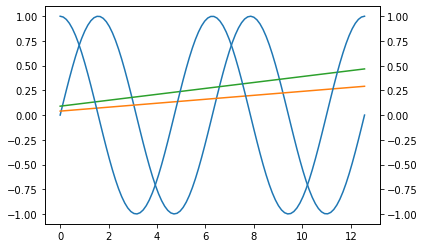

In [35]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax1 = plt.subplots(1, 1)             # 做1*1个子图，等价于 " fig, ax1 = plt.subplot() "，等价于 " fig, ax1 = plt.subplots() "
 
ax2 = ax1.twinx()                         # 让2个子图的x轴一样，同时创建副坐标轴。
 
# 作y=sin(x)函数
x1 = np.linspace(0, 4 * np.pi, 100)
y1 = np.sin(x1)
ax1.plot(x1, y1)
 
#  作y = cos(x)函数
x2 = np.linspace(0, 4 * np.pi, 100)       # 表示在区间[0, 4π]之间取100个点（作为横坐标，“线段是有无数多个点组成的”）。
y2 = np.cos(x2)
ax2.plot(x2, y2)

x3 = np.linspace(0, 4 * np.pi, 100)
y3 = 0.02 * x3 + 0.04
ax1.plot(x3, y3)

x4 = np.linspace(0, 4 * np.pi, 100)
y4 = 0.03 * x3 + 0.09
ax1.plot(x4, y4)

plt.savefig('sin_cos_2.png')               # 将窗口另存为png格式图片

如果需要主副y轴都一样：就把ax1和ax2它俩用ax一个取代了。

- 自定义图表样式：比如旋转x轴标签、上边和右边的坐标轴不显示、曲线和y轴对齐等

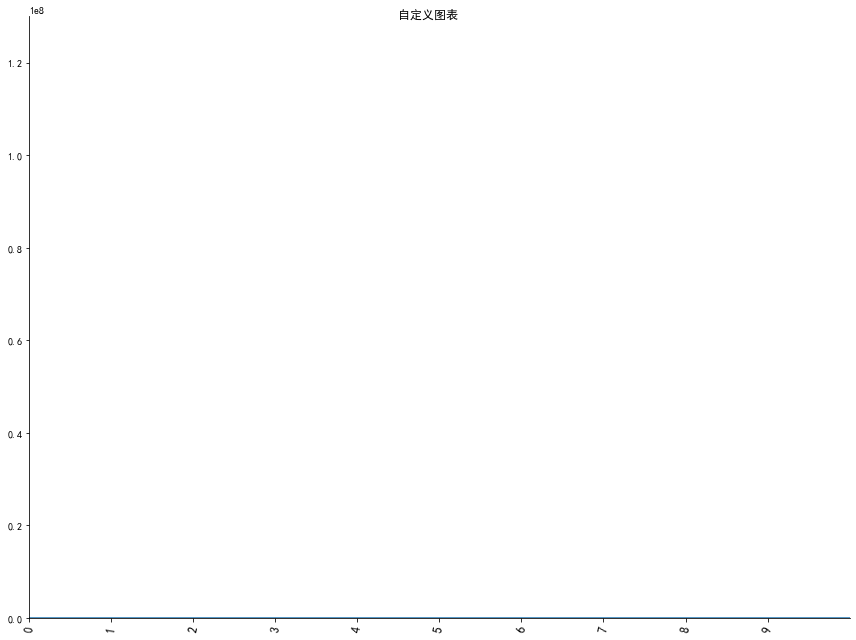

In [44]:
import matplotlib.pyplot as plt
 
plt.rcParams['font.family'] = ['SimHei']              # 解决不能输出中文的问题。不区分大小写，即SimHei’效果等价于‘simhei’，中括号可以不要
plt.rcParams['figure.autolayout'] = True              # 解决不能完整显示的问题（比如因为饼图太大，显示窗口太小）
  
fig, ax = plt.subplots(1, 1, figsize=(12, 9))         # 进一步设定fig的size为12*9
 
ax.spines['top'].set_visible(False)                   # 不显示图表框的上边框
ax.spines['right'].set_visible(False)                 # 不显示图表框的右边框
 
ax.set_xlim(0, 10)                                    # 有时候x轴不会从0显示，使得折线图和y轴有间隙
ax.set_ylim(0, 1.3e8)                                # 和x轴同理

    
plt.xticks(range(0, 10), fontsize=12, rotation=80)    # 针对x轴的标签，指定我们想要设定的范围是(0, 10), 字体大小是12， 逆时针旋转80°
 
# plt.tick_params(bottom='off', left='off', labelbottom='on', lableleft='on')  
# 使x轴和y轴不带比例标识点， labelbottom设定下边、即x轴的标签是否显示。
# 即标题在x轴和y轴形成的方框内部，如下图（详细用法见下注释）。如果需要标题在这上方，使用 plt.title(blabla)            
plt.suptitle('自定义图表', ha='center')  

plt.show()

```python
对于multiple subplots一般情况下，
1）设置 plt.xticks(range(0, 10))只会对最后一个ax起作用。要想作用于所有subplots，要这样：
for ax in axes:
    ax.set_xticks(range(0, 10))
2）标题：显示中文方面-在各个子图上要这样：
plt.title('某个子图的中文title', fontproperties='simhei')，
因为plt.rcParams['font.family'] = 'simhei' 只对整体的标题是有效的。
整体的标题要这样设置：
plt.suptitle(‘全体子图的中文title’)
3）xticks的旋转方面。例如上面的主副坐标轴的共x轴，要这样：
ax1.set_xticklabels(['str format labels'], rotation=80)
而这样的设置无效：plt.xticks(x, rotation=80)。
```

```python
matplotlib.pyplot.suptitle(
t,                          # text缩写。即标题文字。
fontsize | size,            # 设定字体大小。
x,                          # 设定标题相对于x轴的位置，默认是'0.5'。
y,                          # 设定标题相对于y轴的位置，默认是'0.98'。
ha | horizontalalignment,   # 和参数x一起使用，设定标题水平方位，默认是‘center’。共3个可选值{'center', 'left', right'}。
va | verticalalignment,     # 和参数y一起使用，设定标题垂直方位， 默认是'top'。共4个可选值{'top', 'center', 'bottom', 'baseline'}。
fontweight | weight         # 设定字体权重。
)
```